In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from collections import OrderedDict

In [3]:
class SGD:
    def __init__(self,learn_rate=0.01) -> None:
        self.lr = learn_rate

    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [4]:
class Momentum:
    def __init__(self,learn_rate = 0.01,momentum = 0.9) -> None:
        self.lr = learn_rate
        self.momentum = momentum
        self.v = None

    def update(self,params,grads):
        if self.v is None:
            self.v = {}
            for key,val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

In [5]:
class AdaGrad:
    def __init__(self,learn_rate = 0.01) -> None:
        self.lr = learn_rate
        self.h = None

    def update(self,params,grads):
        if self.h is None:
            self.h = {}
            for key,val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key]*grads[key]
            params[key] -=self.lr*grads[key]/(np.sqrt(self.h[key])+1e-7)

In [6]:
class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)


In [7]:
def f(x,y):
    return x**2 / 20.0 + y**2

def df(x,y):
    dx = x/10.0
    dy = 2.0*y
    return dx,dy

In [8]:
init_pos = [-7.0,2.0]
params = {}
params['x'] , params['y'] = init_pos[0] , init_pos[1]
grads = {}
grads['x'],grads['y'] = 0,0

In [9]:
optimizers = OrderedDict()
optimizers['SGD'] = SGD(learn_rate=0.95)
optimizers['Momentum'] = Momentum(learn_rate=0.1)
optimizers['AdaGrad'] = AdaGrad(learn_rate=1.5)
optimizers['Adam'] = Adam(lr=0.3)

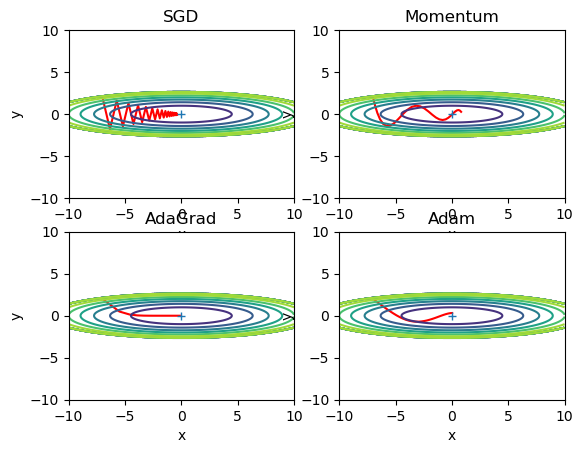

In [10]:
idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'],params['y'] = init_pos[0],init_pos[1]

    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        grads['x'],grads['y'] = df(params['x'],params['y'])
        optimizer.update(params,grads)

    x = np.arange(-10,10,0.01)
    y = np.arange(-5,5,0.01)
    X,Y = np.meshgrid(x,y)
    Z = f(X,Y)
    mask = Z>7
    Z[mask] = 0

    plt.subplot(2,2,idx)
    idx += 1

    plt.plot(x_history,y_history,color ='red')
    plt.plot(0,0,'+')
    plt.contour(X,Y,Z)
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.title(key)
    plt.xlabel('x')
    plt.ylabel('y')

plt.show()

In [11]:
x = np.arange(-10,10,0.01)
y = np.arange(-5,5,0.01)
X,Y = np.meshgrid(x,y)
X,Y,X.shape,x.shape,y.shape

(array([[-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99],
        [-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99],
        [-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99],
        ...,
        [-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99],
        [-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99],
        [-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99]]),
 array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
        [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
        [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
        ...,
        [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
        [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
        [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]]),
 (1000, 2000),
 (2000,),
 (1000,))

In [22]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

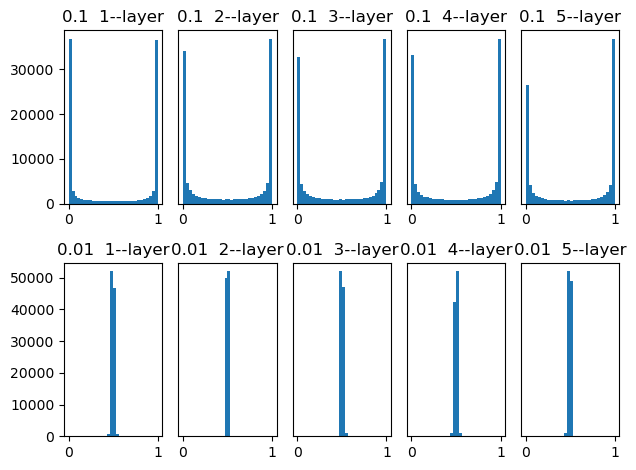

In [26]:
x = np.random.randn(1000,100)
x1 = np.random.rand(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}
activations1 = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
        x1 = activations1[i-1]

    w = np.random.randn(node_num,node_num) * 1
    w1 = np.random.randn(node_num,node_num)*(0.01)
    a = np.dot(x,w)
    a1 = np.dot(x1,w1)
    z = sigmoid(a)
    z1 = sigmoid(a1)
    activations[i] = z
    activations1[i] = z1

for i,(a,a1) in enumerate(zip(activations.values(),activations1.values())):
    plt.subplot(2,len(activations),i+1)
    plt.title('0.1  '+str(i+1)+'--layer')
    if i!=0:plt.yticks([],[])
    plt.hist(a.flatten(),30,range=(0,1))

    plt.subplot(2,len(activations1),len(activations)+i+1)
    plt.title('0.01  '+str((i+1)%6)+'--layer')
    if(i%5)!=0:plt.yticks([],[])
    plt.hist(a1.flatten(),30,range=(0,1))

plt.tight_layout()
plt.show()

权重初始值很重要

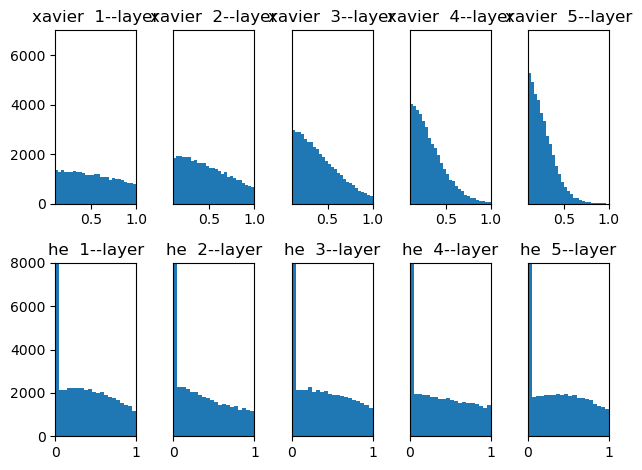

In [41]:
x = np.random.randn(1000,100)
x1 = np.random.rand(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}
activations1 = {}

for i in range(hidden_layer_size):
    if i!=0:
        x = activations[i-1]
        x1 = activations1[i-1]

    w = np.random.randn(node_num,node_num) * np.sqrt(1.0 / node_num)
    w1 = np.random.randn(node_num,node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x,w)
    a1 = np.dot(x1,w1)
    z = ReLU(a)
    z1 = ReLU(a1)
    activations[i] = z
    activations1[i] = z1

for i,(a,a1) in enumerate(zip(activations.values(),activations1.values())):
    plt.subplot(2,len(activations),i+1)
    plt.title('xavier  '+str(i+1)+'--layer')
    if i!=0:plt.yticks([],[])
    plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(),30,range=(0,1))

    plt.subplot(2,len(activations1),len(activations)+i+1)
    plt.title('he  '+str((i+1)%6)+'--layer')
    if(i%5)!=0:plt.yticks([],[])
    plt.xlim(0, 1)
    plt.ylim(0, 8000)
    plt.hist(a1.flatten(),20,range=(0,1))

plt.tight_layout()
plt.show()

Batch Normalization\
以进行学习时的mini-batch为单位 进行正规化 使数据分布均值为0方差为1

权值衰减\
为损失函数加上权重的平方范数（L2\
Dropout

In [ ]:
class Dropout:
    def __init__(self,dropout_ratio = 0.5) -> None:
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self,x,train_flag = True):
        if train_flag:
            self.mask = np.random.rand(*x.shape)>self.dropout_ratio
            return x * self.mask

超参数：\
各层神经元数量、batch_size、参数更新时的学习率或权值衰减

训练数据用于学习   测试数据用于评估泛化能力  不能用测试数据评估超参的性能
用于调整超参数的数据 一般被称为验证数据\
从训练数据中实现分割20%作为验证数据

先选个超参的范围 之后减少epoch 缩短一次评估所需时间

激活函数使用tanh或者sigmoid时 用xaizer初始化权值

激活函数使用relu或者leakly relu时 推荐使用he初始化权值

批归一化 batchnorm 插入全连接层后 激活函数之前